import neccesory libraries

In [1]:
import pandas as pd 
import numpy as np 
import scipy.stats as stat
import re
import seaborn as sns
import matplotlib.pyplot as plt 



In [2]:
# load the scrapped dataset 
df = pd.read_csv('https://raw.githubusercontent.com/Harshad1025/JustWatch-Scraper-Analytics/ba847b38af169ab3e3b0474c621963668b7a35e2/movies_data/movie_data.csv')

In [3]:
# shape of dataset 
df.shape

(970, 5)

In [4]:
# first view of data set
df.head()

,Movie Title,Release Year,IMDb Rating,Movie Link,Stream
0,True Detective,(2014),8.9,/in/tv-show/true-detective,Jio Cinema
1,Indian Police Force,(2024),6.0,/in/tv-show/indian-police-force,Amazon Prime Video
2,Reacher,(2022),8.1,/in/tv-show/jack-reacher,Amazon Prime Video
3,Animal,(2023),6.4,/in/movie/animal-2022,"Netflix, Bookmyshow"
4,Mirzapur,(2018),8.5,/in/tv-show/mirzapur,Amazon Prime Video


In [5]:
df.tail()

,Movie Title,Release Year,IMDb Rating,Movie Link,Stream
965,Hridayam,(2022),8.1,/in/movie/hridayam,NaN
966,American Gods,(2017),7.6,/in/tv-show/american-gods,Amazon Prime Video
967,Gigolò per caso,(2023),6.5,/in/tv-show/gigolo-per-caso,Amazon Prime Video
968,Level 1 Demon Lord & One Room Hero,(2023),6.6,/in/tv-show/level-1-demon-lord-and-one-room-hero,Netflix
969,Saw X,(2023),6.6,/in/movie/saw-x,"Lionsgate Play, Apple TV, Apple TV"


In [6]:
# information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Movie Title   970 non-null    object 
 1   Release Year  970 non-null    object 
 2   IMDb Rating   938 non-null    float64
 3   Movie Link    970 non-null    object 
 4   Stream        819 non-null    object 
dtypes: float64(1), object(4)
memory usage: 38.0+ KB


In [7]:
# check wheather null values are present in the dataset 
df.isnull().sum()

Movie Title       0
Release Year      0
IMDb Rating      32
Movie Link        0
Stream          151
dtype: int64

In [8]:
# check duplicate rows
df.duplicated().sum()

0

In [9]:
# dataset columns
df.columns

Index(['Movie Title', 'Release Year', 'IMDb Rating', 'Movie Link', 'Stream'], dtype='object')

In [10]:
# Remove non-numeric characters and convert to number for 'Release Year' column
df['Release Year'] = df['Release Year'].apply(lambda x: re.sub('[^0-9]', '', x)).astype(int)


In [11]:
# statistical summary about dataset
df.describe()

,Release Year,IMDb Rating
count,970.000000,938.000000
mean,2017.118557,7.499574
std,8.006278,1.167379
min,1962.000000,2.000000
25%,2015.000000,7.000000
50%,2020.000000,7.800000
75%,2023.000000,8.300000
max,2024.000000,9.500000


In [12]:
missing_values_df = df[df.isna().any(axis=1)]
missing_values_df

,Movie Title,Release Year,IMDb Rating,Movie Link,Stream
23,Fargo,2014,8.9,/in/tv-show/fargo,NaN
29,Mastram,2020,7.1,/in/tv-show/mastram,NaN
35,Love Never Lies: Poland,2022,NaN,/in/tv-show/love-never-lies-poland,Netflix
48,ted,2024,8.0,/in/tv-show/ted,NaN
50,Hanu-Man,2024,8.5,/in/movie/hanu-man,NaN
...,...,...,...,...,...
955,The Handmaid's Tale,2017,8.4,/in/tv-show/the-handmaids-tale,NaN
957,And Then There Were None,2015,7.8,/in/tv-show/and-then-there-were-none,NaN
960,Frosty the Snowman,1969,7.3,/in/movie/frosty-the-snowman,NaN
962,CAT,2022,NaN,/in/tv-show/cat,Netflix


<Axes: >

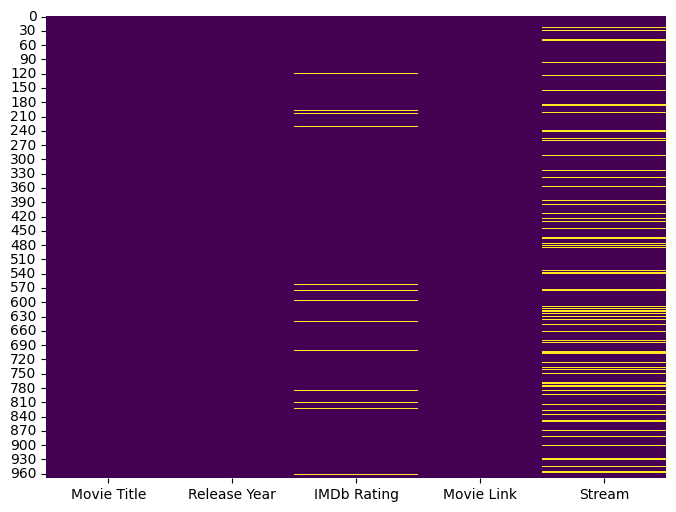

In [13]:
# Visualising mising values with heatmap 

plt.figure(figsize=(8, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

In [14]:
# randomly inspecting data
df.sample()

,Movie Title,Release Year,IMDb Rating,Movie Link,Stream
234,Ek Mahanayak - Dr B R Ambedkar,2019,7.5,/in/tv-show/ek-mahanayak-dr-b-r-ambedkar,Zee5


In [15]:
df['Release Year'].isna().sum()

0

## a. Data filtering 

 - Only include movies and TV shows released in the last 2 years (from the current date).

In [16]:
current_year = pd.Timestamp.now().year
current_year

2024

In [17]:
# Get the current year
current_year = pd.Timestamp.now().year 

# Calculate the year 2 years ago from the current year
two_years_ago_year = current_year - 2

date_filtered_df = df[df['Release Year']>two_years_ago_year]


In [18]:
date_filtered_df.sample(5)

,Movie Title,Release Year,IMDb Rating,Movie Link,Stream
672,Half CA,2023,8.4,/in/tv-show/half-ca,Amazon miniTV
193,Sengoku Youko,2024,7.7,/in/tv-show/sengoku-youko,Netflix
663,Badi Heroine Banti Hai,2024,7.9,/in/tv-show/badi-heroine-banti-hai,Amazon miniTV
1,Indian Police Force,2024,6.0,/in/tv-show/indian-police-force,Amazon Prime Video
201,The Family Plan,2023,6.3,/in/movie/the-family-plan,Apple TV Plus


- Only include movies and TV shows with an IMDb rating of 7 or higher.

In [19]:
filtered_df = date_filtered_df[date_filtered_df['IMDb Rating']>=7]

In [20]:
filtered_df

,Movie Title,Release Year,IMDb Rating,Movie Link,Stream
7,Solo Leveling,2024,8.4,/in/tv-show/solo-leveling-2024,Crunchyroll
9,12th Fail,2023,9.2,/in/movie/12th-fail,"Hotstar, Bookmyshow"
11,Death and Other Details,2024,7.0,/in/tv-show/death-and-other-details,Hotstar
17,Farzi,2023,8.4,/in/tv-show/farzi,Amazon Prime Video
19,Berlin,2023,7.0,/in/tv-show/berlin,Netflix
...,...,...,...,...,...
882,The Woman in the Wall,2023,7.2,/in/tv-show/the-woman-in-the-wall,NaN
899,Sleep Call,2023,7.3,/in/movie/sleep-call,Amazon Prime Video
912,Dungeons & Dragons: Honor Among Thieves,2023,7.3,/in/movie/dungeons-and-dragons-2023,"Amazon Prime Video, Amazon Video, Apple TV"
925,Teri Baaton Mein Aisa Uljha Jiya,2024,7.4,/in/movie/untitled-shahid-kapoor-kriti-sanon-film,Bookmyshow


## b. Data Analysis:

- Calculate the average IMDb rating for the scraped movies and TV shows.
      

In [21]:
avg_imdb_rating = df['IMDb Rating'].mean()
print(f"Average IMDB Rating for scrapped movies: {round(avg_imdb_rating,2)}")

Average IMDB Rating for scrapped movies: 7.5


- Identify the top 5 movies that have the Highest IMDB rating

In [22]:
top_5_movies_by_Imdb_rating = df.sort_values(by = 'IMDb Rating',ascending=False).head()
top_5_movies_by_Imdb_rating[['Movie Title','IMDb Rating']]

,Movie Title,IMDb Rating
46,Breaking Bad,9.5
203,Band of Brothers,9.4
685,Bluey,9.4
500,Devon Ke Dev...Mahadev,9.3
156,Chernobyl,9.3


- Determine the streaming service with the most significant number of offerings.

In [23]:
# Split entries in the 'Stream' column into individual streaming services
stream_list = df['Stream'].str.split(', ')

# Flatten the list of streaming services
stream_flat_list = [stream for sublist in stream_list.dropna() for stream in sublist]

# Count the occurrences of each streaming service
stream_counts = pd.Series(stream_flat_list).value_counts()

# Determine the streaming service with the most significant number of offerings
most_common_service = stream_counts.idxmax()
number_of_offerings = stream_counts.max()

print(f"The streaming service with the most significant number of offerings is '{most_common_service}' with {number_of_offerings} offerings.")


The streaming service with the most significant number of offerings is 'Netflix' with 264 offerings.


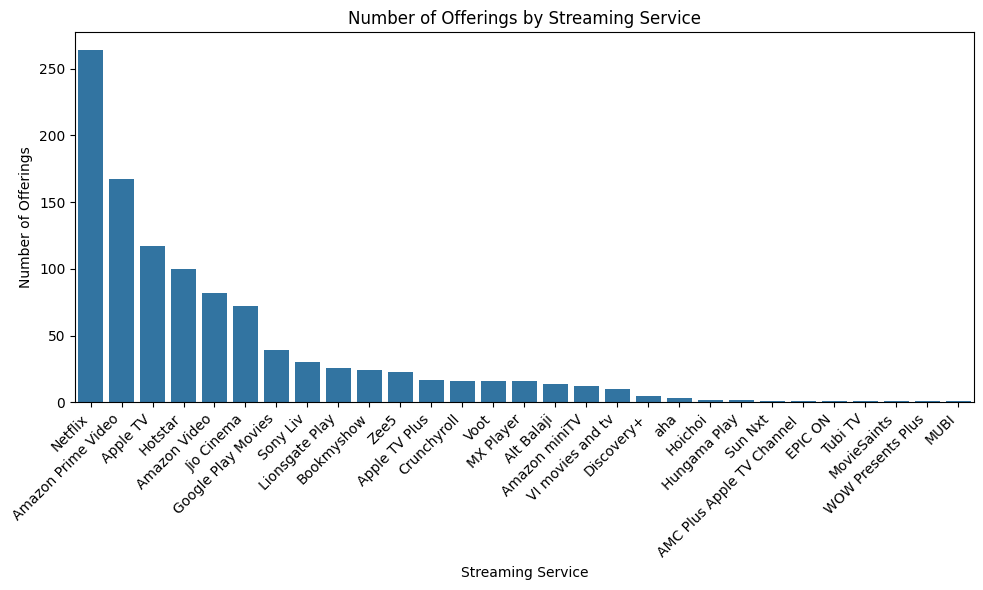

In [24]:


plt.figure(figsize=(10, 6))
sns.barplot(stream_counts)
plt.title('Number of Offerings by Streaming Service')
plt.xlabel('Streaming Service')
plt.ylabel('Number of Offerings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- top 10 release years

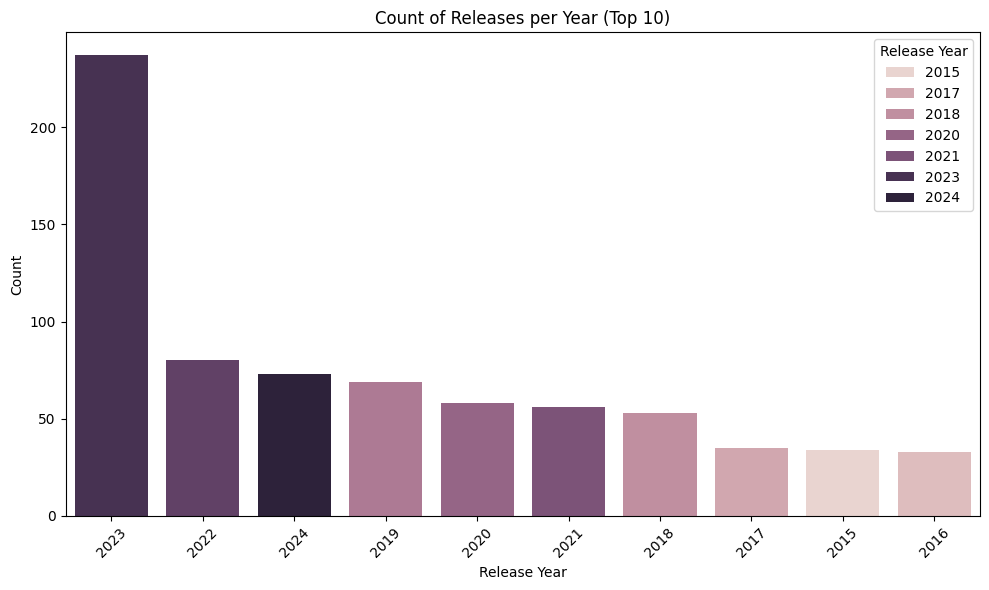

In [25]:

# Get the top 10 release years and their counts
top_10_release_years = df['Release Year'].value_counts().nlargest(10).index

# Filter the DataFrame to include only the top 10 release years
df_top_10 = df[df['Release Year'].isin(top_10_release_years)]

# Calculate the count of releases for each year
release_year_counts = df_top_10['Release Year'].value_counts()

# Sort the counts in descending order and get the index
sorted_index = release_year_counts.sort_values(ascending=False).index



# Set the figure size
plt.figure(figsize=(10, 6))

# Create count plot for the top 10 release years
sns.countplot(x='Release Year', data=df_top_10,order=sorted_index, hue='Release Year')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add labels and title
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Count of Releases per Year (Top 10)')

# Show plot
plt.tight_layout()
plt.show()


In [26]:
df.to_csv('cleaned_movie_data.csv', index=False)




🎬 **Conclusion:**

📊 **Data Overview:**
- The dataset contains 970 entries of movies scraped from JustWatch.
- Data cleaning and processing addressed missing IMDb ratings (32) and streaming service values (151), resulting in a clean dataset.
- No duplicate rows were found in the dataset.

🔍 **Data Filtering:**
- Included only movies released in the last two years and with an IMDb rating of 7 or higher.

📈 **Data Analysis:**
- Calculated the average IMDb rating for the scraped movies, resulting in an average rating of 7.5.
- Identified the top 5 movies with the highest IMDb ratings, showcasing popular titles.
- Determined that 'Netflix' had the most significant number of offerings among the scraped movies.
- Explored the distribution of movie releases over the years, highlighting the top 10 release years.

🔍 **Insights:**
- The analysis provides insights into movie ratings, streaming services, and release trends, which can inform decision-making in the entertainment industry.

📝 **Overall:**
- This project involved scraping, cleaning, and analyzing movie data from JustWatch, offering valuable insights for stakeholders in the movie industry.